In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: xlabel='smoker', ylabel='Count'>

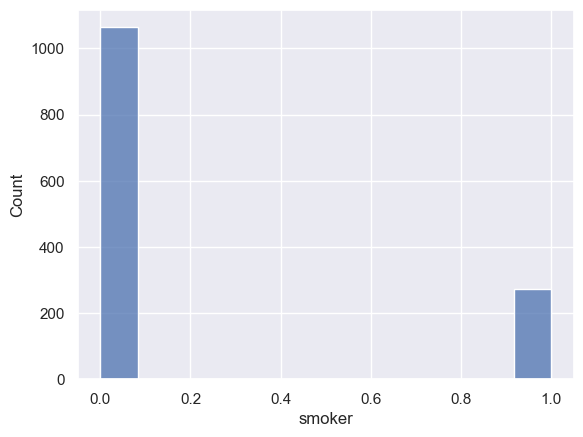

In [18]:
# # sns.set(font_scale=1)
# # plt.figure(figsize=(2, 2))
# # sns.pairplot(X)
# # plt.show()

# #df['region'].value_counts()
# sns.histplot(df['smoker'])

In [3]:
df['sex'] = df['sex'].replace({'male':1, "female":-1})
df['smoker'] = df['smoker'].replace({'yes':1, "no":-1})
df_region = pd.get_dummies(df["region"])
df_region['southeast'] = df_region['southeast'].replace({0:-1})
df_region['southwest'] = df_region['southwest'].replace({0:-1})
df_region['northeast'] = df_region['northeast'].replace({0:-1})
df_region['northwest'] = df_region['northwest'].replace({0:-1})


X = pd.concat([df.drop(columns = ['region', 'charges']), df_region], axis = 1)
y = df['charges']
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,-1,27.900,0,1,-1,-1,-1,1
1,18,1,33.770,1,-1,-1,-1,1,-1
2,28,1,33.000,3,-1,-1,-1,1,-1
3,33,1,22.705,0,-1,-1,1,-1,-1
4,32,1,28.880,0,-1,-1,1,-1,-1


In [4]:
#generating interaction terms
X_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
X_interaction = X_interaction[:,0:39]
#creating a new dataframe with the interaction terms included


X_interaction = pd.DataFrame(X_interaction, columns = ['age','sex','bmi','children','smoker','northeast','northwest', 'southeast', 'southwest',
                                                       'age:sex','age:bmi','age:children','age:smoker', 'age:northeast', 'age:northwest', 'age:southeast', 'age:southwest',
                                                        'sex:bmi','sex:children', 'sex:smoker', 'sex:northeast', 'sex:northwest', 'sex:southeast', 'sex:southwest',
                                                       'bmi:children','bmi:smoker', 'bmi:northeast', 'bmi:northwest', 'bmi:southeast', 'bmi:southwest',
                                                       'children:smoker', 'children:northeast', 'children:northwest', 'children:southeast', 'children:southwest',
                                                       'smoker:northeast', 'smoker:northwest', 'smoker:southeast', 'smoker:southwest'])
X_interaction

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,age:sex,...,bmi:southwest,children:smoker,children:northeast,children:northwest,children:southeast,children:southwest,smoker:northeast,smoker:northwest,smoker:southeast,smoker:southwest
0,19.0,-1.0,27.900,0.0,1.0,-1.0,-1.0,-1.0,1.0,-19.0,...,27.900,0.0,-0.0,-0.0,-0.0,0.0,-1.0,-1.0,-1.0,1.0
1,18.0,1.0,33.770,1.0,-1.0,-1.0,-1.0,1.0,-1.0,18.0,...,-33.770,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
2,28.0,1.0,33.000,3.0,-1.0,-1.0,-1.0,1.0,-1.0,28.0,...,-33.000,-3.0,-3.0,-3.0,3.0,-3.0,1.0,1.0,-1.0,1.0
3,33.0,1.0,22.705,0.0,-1.0,-1.0,1.0,-1.0,-1.0,33.0,...,-22.705,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-1.0,1.0,1.0
4,32.0,1.0,28.880,0.0,-1.0,-1.0,1.0,-1.0,-1.0,32.0,...,-28.880,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,-1.0,-1.0,1.0,-1.0,-1.0,50.0,...,-30.970,-3.0,-3.0,3.0,-3.0,-3.0,1.0,-1.0,1.0,1.0
1334,18.0,-1.0,31.920,0.0,-1.0,1.0,-1.0,-1.0,-1.0,-18.0,...,-31.920,-0.0,0.0,-0.0,-0.0,-0.0,-1.0,1.0,1.0,1.0
1335,18.0,-1.0,36.850,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-18.0,...,-36.850,-0.0,-0.0,-0.0,0.0,-0.0,1.0,1.0,-1.0,1.0
1336,21.0,-1.0,25.800,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-21.0,...,25.800,-0.0,-0.0,-0.0,-0.0,0.0,1.0,1.0,1.0,-1.0


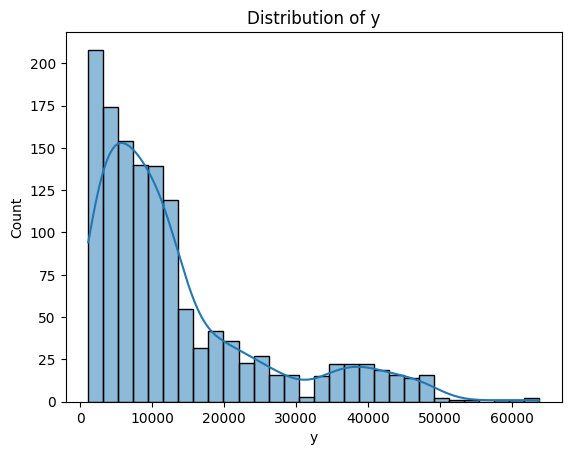

In [5]:
sns.histplot(y, bins=30, kde=True) 
plt.title('Distribution of y')  
plt.xlabel('y') 
plt.ylabel('Count')  
plt.show()  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_interaction, y, test_size = 0.3)


In [6]:
model = linear_model.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:54:33   Log-Likelihood:                -9219.8
No. Observations:                 936   AIC:                         1.851e+04
Df Residuals:                     902   BIC:                         1.867e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   89.4496     30.250      2.957      0.003      30.081     148.818
sex                 -227.8379    455.742     -0.500      0.617   -1122.276     666.601
bmi                  295.7389     42.216      7.005      0.000     212.886     378.592
children             487.8702    376.459      1.296      0.195    -250.967    1226.707
smoker             -5093.6879    573.099     -8.888      0.000   -6218.451   -3968.925
northeast           4366.5716   1564.646      2.791      0.005    1295.801    7437.342
northwest           4206.7969   1597.297      2.634      0.009    1071.945    7341.649
southeast           5833.3869   1466.031      3.979      0.000    2956.158    8710.616
southwest           4341.4709   1523.474      2.850      0.004    1351.505    7331.437
age:sex                6.6726     11.162      0.598      0.550     -15.235      28.580
age:bmi                3.4075      1.904      1.789      0.074      -0.330       7.145
age:children         -20.9929     10.224     -2.053      0.040     -41.059      -0.927
age:smoker            14.5260     13.893      1.046      0.296     -12.741      41.793
age:northeast        -53.7800     18.559     -2.898      0.004     -90.204     -17.356
age:northwest        -52.6929     19.382     -2.719      0.007     -90.732     -14.654
age:southeast        -47.2996     16.244     -2.912      0.004     -79.180     -15.419
age:southwest        -25.1266     17.897     -1.404      0.161     -60.252       9.999
sex:bmi                0.9996     26.935      0.037      0.970     -51.862      53.862
sex:children        -113.4913    129.304     -0.878      0.380    -367.264     140.281
sex:smoker            44.3340    197.053      0.225      0.822    -342.402     431.070
sex:northeast        127.8005    276.978      0.461      0.645    -415.797     671.398
sex:northwest         77.4235    279.372      0.277      0.782    -470.871     625.718
sex:southeast        157.8881    244.266      0.646      0.518    -321.508     637.284
sex:southwest         92.5636    260.591      0.355      0.723    -418.872     603.999
bmi:children           8.6031     22.292      0.386      0.700     -35.147      52.353
bmi:smoker           708.8264     33.081     21.427      0.000     643.901     773.752
bmi:northeast       -115.7458     31.395     -3.687      0.000    -177.362     -54.130
bmi:northwest       -125.6187     32.912     -3.817      0.000    -190.211     -61.026
bmi:southeast       -188.0422     31.314     -6.005      0.000    -249.499    -126.585
bmi:southwest       -162.0711     30.838     -5.256      0.000    -222.593    -101.549
children:smoker     -142.2209    165.326     -0.860      0.390    -466.689     182.248
children:northeast  -157.3285    225.237     -0.699      0.485    -599.378     284.721
children:northwest  -138.0231    226.2

In [7]:
model.pvalues[model.pvalues <= 0.05]

age                 3.187309e-03
bmi                 4.815724e-12
smoker              3.327676e-18
northeast           5.369218e-03
northwest           8.590705e-03
southeast           7.474900e-05
southwest           4.475457e-03
age:children        4.033272e-02
age:northeast       3.848984e-03
age:northwest       6.680861e-03
age:southeast       3.681757e-03
bmi:smoker          1.181805e-82
bmi:northeast       2.407046e-04
bmi:northwest       1.444107e-04
bmi:southeast       2.770378e-09
bmi:southwest       1.842091e-07
smoker:northeast    1.201842e-11
smoker:northwest    8.103117e-12
smoker:southeast    2.349765e-15
smoker:southwest    6.409133e-18
dtype: float64

In [8]:
model.params[model.pvalues <= 0.05]

age                   89.449563
bmi                  295.738895
smoker             -5093.687919
northeast           4366.571648
northwest           4206.796891
southeast           5833.386871
southwest           4341.470910
age:children         -20.992893
age:northeast        -53.780014
age:northwest        -52.692897
age:southeast        -47.299566
bmi:smoker           708.826382
bmi:northeast       -115.745815
bmi:northwest       -125.618686
bmi:southeast       -188.042167
bmi:southwest       -162.071122
smoker:northeast    2402.276431
smoker:northwest    2454.799601
smoker:southeast    2412.216877
smoker:southwest    2918.082929
dtype: float64

In [47]:
print('mean of residual: ', model.resid.mean())
print('variance of residual: ',np.var(model.resid))

mean of residual:  6.131082574208068e-10
variance of residual:  24486020.041731272


In [48]:
y_pred = model.predict(X_test)
pred_resid = y_pred - y_test

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('rmse: ', rmse)

rmse:  4419.234087250406
